# Project 2 - Advanced Methods in Applied Statistics 2024 - Emilie Jessen

In [4]:
pip 

  Using cached https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'RECORD'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from iminuit import Minuit

In [2]:
import lightgbm
import cmake 
from lightgbm import LGBMClassifier

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Add grid
mpl.rc('axes', grid=True)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid', 'black', 'slategrey', 
                'navy', 'magenta', 'forestgreen', 'lightblue', 'maroon', 'gold', 'lightcoral', 
                'mediumseagreen', 'darkorange', 'darkviolet', 'dimgray', 'darkblue', 'darkred',]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

In [5]:
save_plots = True
np.random.seed(42)

# Exercise 1a

In [6]:
# Load and sort the data
data = pd.read_csv('earning_potential_train_test.txt', delimiter = ',', header=0, index_col=None)
data.sort_values(by='earning', inplace=True)

# Create target array  
# Dummification of Earning Column (1: >50K, 0: <=50K)
data['earning'] = pd.get_dummies(data['earning'], drop_first=True, dtype=int)

In [7]:
# Find the number of individuals with high/low earnings in the full data set
N_high = np.sum(data['earning'] == True)
N_low = np.sum(data['earning'] == False)
ratio = N_high / N_low

# Print results
print(f'There are {len(data)} individuals included in the full data set.')
print(f'Higher income earners: {N_high}')
print(f'Lower income earners: {N_low}')
print(f'The ratio of higher to lower income earners is {ratio:.2f}.')

There are 4500 individuals included in the full data set.
Higher income earners: 1091
Lower income earners: 3409
The ratio of higher to lower income earners is 0.32.


In [8]:
# Split the data into a training and test set
train = pd.concat([data.iloc[:int(N_low/2)], data.iloc[N_low:int(N_low + N_high/2 + 1)]])
test = pd.concat([data.iloc[int(N_low/2): int(N_low)], data.iloc[int(N_low + N_high/2 + 1):]])

# Find the number of individuals with high/low earnings in the training set
N_high_train = np.sum(train['earning'] == True)
N_low_train = np.sum(train['earning'] == False)
ratio_train = N_high_train / N_low_train

# Find the number of individuals with high/low earnings in the test set
N_high_test = np.sum(test['earning'] == True)
N_low_test = np.sum(test['earning'] == False)
ratio_test = N_high_test / N_low_test

# Print results
print('\t\t\t Train \t\t\t Test')
print('--------------------------------------------------------------')
print(f'TOTAL: \t\t\t {len(train)} \t\t\t {len(test)}')
print(f'HIGH EARNERS: \t\t {N_high_train} \t\t\t {N_high_test}')
print(f'LOW EARNERS: \t\t {N_low_train} \t\t\t {N_low_test}')
print(f'RATIO: \t\t\t {ratio_train:.2f} \t\t\t {ratio_test:.2f}')


			 Train 			 Test
--------------------------------------------------------------
TOTAL: 			 2250 			 2250
HIGH EARNERS: 		 546 			 545
LOW EARNERS: 		 1704 			 1705
RATIO: 			 0.32 			 0.32


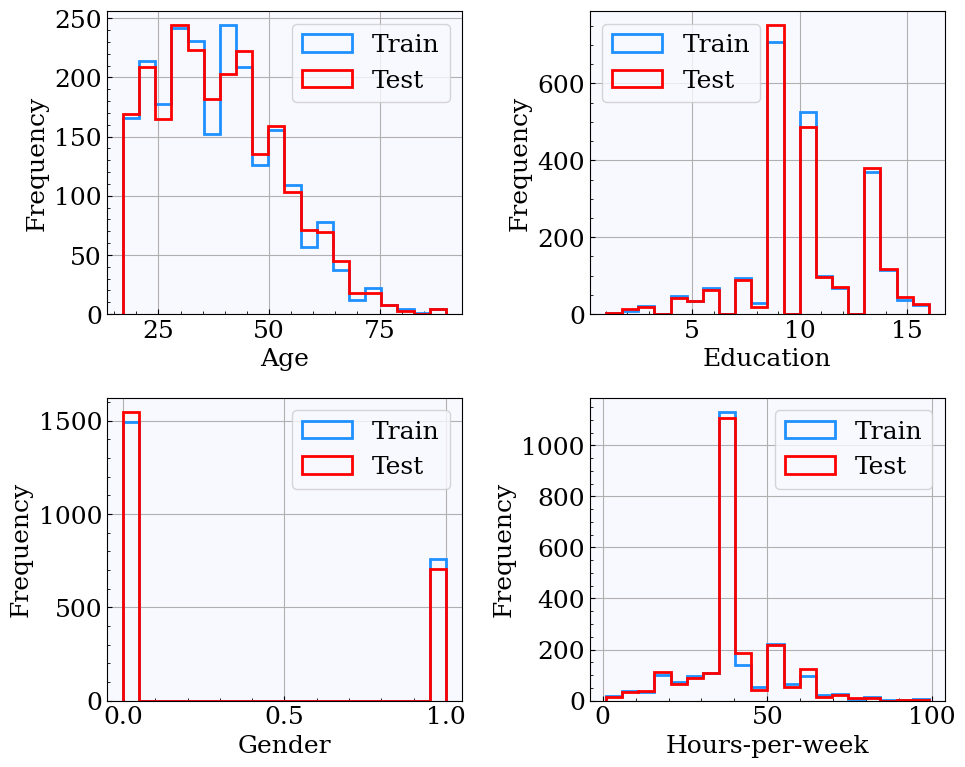

In [9]:
# Plot the distribution of the four variables for the training and test set 

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Age
ax[0, 0].hist(train['age'], bins=20, histtype='step', label='Train', lw=2)
ax[0, 0].hist(test['age'], bins=20, histtype='step', label='Test', lw=2)

ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# Education
ax[0, 1].hist(train['education'], bins=20, histtype='step', label='Train', lw=2)
ax[0, 1].hist(test['education'], bins=20, histtype='step', label='Test', lw=2)

ax[0, 1].set_xlabel('Education')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].legend()

# Gender
ax[1, 0].hist(train['gender'], bins=20, histtype='step', label='Train', lw=2)
ax[1, 0].hist(test['gender'], bins=20, histtype='step', label='Test', lw=2)

ax[1, 0].set_xlabel('Gender')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# Hours-per-week
ax[1, 1].hist(train['hours-per-week'], bins=20, histtype='step', label='Train', lw=2)
ax[1, 1].hist(test['hours-per-week'], bins=20, histtype='step', label='Test', lw=2)

ax[1, 1].set_xlabel('Hours-per-week')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

fig.tight_layout()

if save_plots:
    plt.savefig('earning_potential_train_test.png', dpi=300)

In [10]:
# Separating the independent and target variable on both data sets
x_train = train.drop(columns = ['earning'], axis = 1).values
y_train = train['earning'].values
x_test = test.drop(columns = ['earning'], axis = 1).values
y_test = test['earning'].values

# Shuffling the data
np.random.seed(42)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
x_train = x_train[idx]
y_train = y_train[idx]

idx = np.arange(len(x_test))
np.random.shuffle(idx)
x_test = x_test[idx]
y_test = y_test[idx]

In [11]:
# Specify parameters and distributions to sample from

model = LGBMClassifier(force_col_wise=True, random_state=42)

parameters_RandomSearch = {'max_depth': scipy.stats.randint(2, 5), 
                           'n_estimators': scipy.stats.randint(1, 150),
                           'learning_rate': scipy.stats.uniform(0.01, 0.1),}

# Chose number of iterations
k = 6
n_iter_search = 25

RandomSearch = RandomizedSearchCV(model, 
                                  param_distributions=parameters_RandomSearch,
                                  n_iter=n_iter_search,
                                  return_train_score=True,
                                  cv=k,
                                  scoring = 'balanced_accuracy', 
                                  random_state=42)

# Fit the random search instance
RandomSearch.fit(x_train, y_train)

# Get results              
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.3f}")

[LightGBM] [Info] Number of positive: 455, number of negative: 1420
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 1875, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242667 -> initscore=-1.138115
[LightGBM] [Info] Start training from score -1.138115
[LightGBM] [Info] Number of positive: 455, number of negative: 1420
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1875, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242667 -> initscore=-1.138115
[LightGBM] [Info] Start training from score -1.138115
[LightGBM] [Info] Number of positive: 455, number of negative: 1420
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 1875, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242667 -> initscore=-1.138115
[LightGBM] [Info] Start training from score -1.138115
[LightGBM] [Info] Numb

In [12]:
# Set the hyperparameters found
max_depth_RS = RandomSearch.best_params_['max_depth']
n_estimators_RS = RandomSearch.best_params_['n_estimators']
learning_rate_RS = RandomSearch.best_params_['learning_rate']

In [13]:
# Create the classifier
bdt = LGBMClassifier(max_depth=max_depth_RS, 
                     n_estimators=n_estimators_RS, 
                     learning_rate=learning_rate_RS,
                     random_state=42, 
                     force_col_wise=True)

# Train the classifier  
model = bdt.fit(x_train, y_train)

# Test the classifier on the training data
y_pred_binary = model.predict(x_train)
y_pred = model.predict_proba(x_train)

# Model accuracy on training data 
accuracy_score = metrics.balanced_accuracy_score(y_train, y_pred_binary)
print(f'Model accuracy in classifying high and low income earners on training data: {accuracy_score:.2f}')

[LightGBM] [Info] Number of positive: 546, number of negative: 1704
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242667 -> initscore=-1.138115
[LightGBM] [Info] Start training from score -1.138115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model accuracy in classifying high and low income earners on training data: 0.66


In [14]:
def estimate_cut(y_pred, y_true): 
    """Function to estimate the cut value for the classified sample to contain 85% high income earners."""

    # Seperate the to income groups
    y_pred_high = y_pred[y_true == 1][:, 1]  
    y_pred_low = y_pred[y_true == 0][:, 1] 

    end = y_pred_high.max() 

    # Find number of high and low income earners above some cut value 
    cut_values = np.linspace(0.5, end, 1000)
    TP = np.zeros(len(cut_values))
    FP = np.zeros(len(cut_values))    
    percentage = np.ones(len(cut_values))

    for i, cut in enumerate(cut_values[:-1]):
        TP[i] = np.sum(y_pred_high > cut)
        FP[i] = np.sum(y_pred_low > cut)
        percentage[i] = TP[i] / (FP[i] + TP[i])

    idx = np.argmin(np.abs(percentage - 0.85))
    cut_value = cut_values[idx]

    return cut_value, percentage, TP, FP, idx

In [15]:
def global_precision(TP, y_true):

    precision = TP / np.sum(y_true == 1)
    
    return precision

In [16]:
cut_value, percentage, TP, FP, cut_idx = estimate_cut(y_pred, y_train)
precision_vals = global_precision(TP, y_train)
precision = global_precision(TP[cut_idx], y_train)

print(f'The cut value for the classified sample to contain at least 85% of the high income earners is {cut_value:.2f}.')
print(f'The precision of the model is {precision:.2f}.')
print(f'Number of high income earners above the cut value: {TP[cut_idx]:.0f}')
print(f'Number of low income earners above the cut value: {FP[cut_idx]:.0f}')
print(f'Percentage of high income earners above the cut value: {TP[cut_idx] / (TP[cut_idx] + FP[cut_idx]):.2f}')

The cut value for the classified sample to contain at least 85% of the high income earners is 0.71.
The precision of the model is 0.10.
Number of high income earners above the cut value: 56
Number of low income earners above the cut value: 11
Percentage of high income earners above the cut value: 0.84


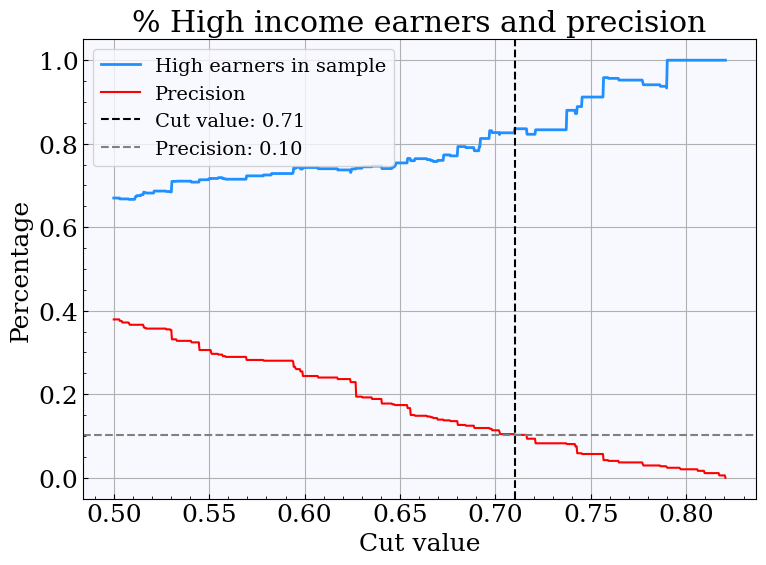

In [17]:
# Plot the precision as a function of the cut value

y_pred_high = y_pred[y_train == 1][:, 1]
cut_values = np.linspace(0.5, y_pred_high.max(), 1000)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(cut_values, percentage, lw=2, label='High earners in sample')
ax.plot(cut_values, precision_vals, color='red', label='Precision')
ax.axvline(cut_value, color='black', linestyle='--', label=f'Cut value: {cut_value:.2f}')
ax.axhline(precision, color='grey', linestyle='--', label=f'Precision: {precision:.2f}')

ax.set_xlabel('Cut value')
ax.set_ylabel('Percentage')
ax.set_title('% High income earners and precision')

ax.legend(fontsize=14)

fig.tight_layout()

save_plots = True
if save_plots:
    plt.savefig('earning_potential_precision.png', dpi=300)


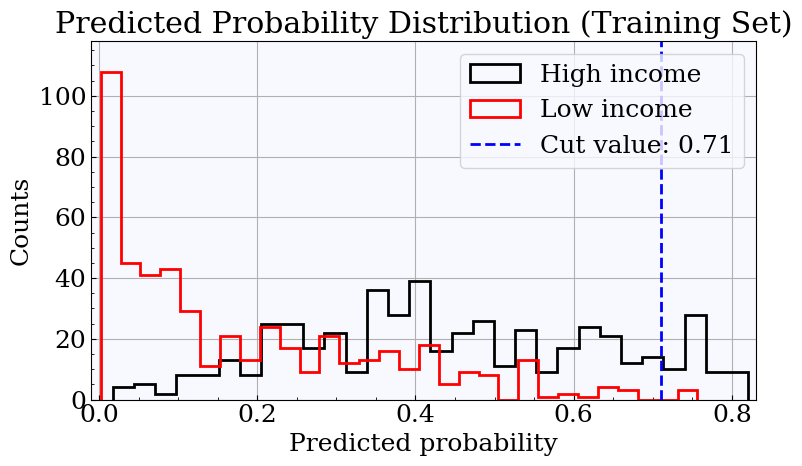

In [18]:
# Plot probability distribution for the training set

# Seperate the to income groups
y_pred_high = y_pred[y_train == 1][:, 1]  
y_pred_low = y_pred[y_train == 0][:, 1]  

# Chose 500 random of each to plot 
idx_high = np.random.choice(len(y_pred_high), 500)
idx_low = np.random.choice(len(y_pred_low), 500)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(y_pred_high[idx_high], bins=30, histtype='step', color='k', label='High income', lw=2)
out = ax.hist(y_pred_low[idx_low], bins=30, histtype='step', color='red', label='Low income', lw=2)
ax.vlines(cut_value, 0, 120, linestyle='--', color='blue', lw=2, label=f'Cut value: {cut_value:.2f}')


ax.set(xlabel='Predicted probability', 
       ylabel='Counts', 
       title='Predicted Probability Distribution (Training Set)', 
       xlim=(-0.01, y_pred_high.max() + 0.01),
       ylim=(0, np.max(out[0]) + 10))

ax.legend()

# Vertical space between plot and title 
plt.subplots_adjust(top=0.85)

fig.tight_layout();

In [19]:
# Test the classifier on the test data
test_y_pred_binary = model.predict(x_test)
test_y_pred = model.predict_proba(x_test)

# Model accuracy on the test data
test_accuracy_score = metrics.balanced_accuracy_score(y_test, test_y_pred_binary)
print(f'Model accuracy in classifying high and low income earners on all test data:: {test_accuracy_score:.2f}')

# Estimate the cut value for the test data
test_cut_value, test_percentage, test_TP, test_FP, test_cut_idx = estimate_cut(test_y_pred, y_test)
test_precision = global_precision(test_TP[test_cut_idx], y_test)

print(f'The cut value for the classified sample to contain at least 85% of the high income earners is {test_cut_value:.2f}.')
print(f'The precision of the model is {test_precision:.2f}.')
print(f'Number of high income earners above the cut value: {test_TP[test_cut_idx]:.0f}')
print(f'Number of low income earners above the cut value: {test_FP[test_cut_idx]:.0f}')
print(f'Percentage of high income earners above the cut value: {test_TP[test_cut_idx] / (test_TP[test_cut_idx] + test_FP[test_cut_idx]):.2f}')

Model accuracy in classifying high and low income earners on all test data:: 0.67
The cut value for the classified sample to contain at least 85% of the high income earners is 0.81.
The precision of the model is 0.02.
Number of high income earners above the cut value: 12
Number of low income earners above the cut value: 3
Percentage of high income earners above the cut value: 0.80


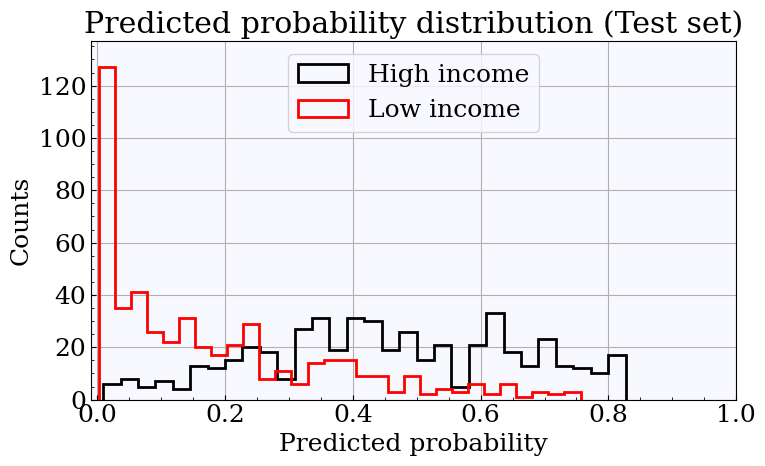

In [20]:
# Plot probability distribution for the test set

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Seperate the to income groups
y_pred_high = test_y_pred[y_test == 1][:, 1]
y_pred_low = test_y_pred[y_test == 0][:, 1]

# Chose 500 random of each to plot
idx_high = np.random.choice(len(y_pred_high), 500)
idx_low = np.random.choice(len(y_pred_low), 500)

ax.hist(y_pred_high[idx_high], bins=30, histtype='step', color='k', label='High income', lw=2)
out = ax.hist(y_pred_low[idx_high], bins=30, histtype='step', color='red', label='Low income', lw=2)

ax.set(xlabel='Predicted probability', 
       ylabel='Counts', 
       title='Predicted probability distribution (Test set)', 
       xlim=(-0.01, 1),
       ylim=(0, np.max(out[0]) + 10))

ax.legend(loc='upper center')

fig.tight_layout()

if save_plots:
    plt.savefig('earning_potential_probability_distribution.png', dpi=300)

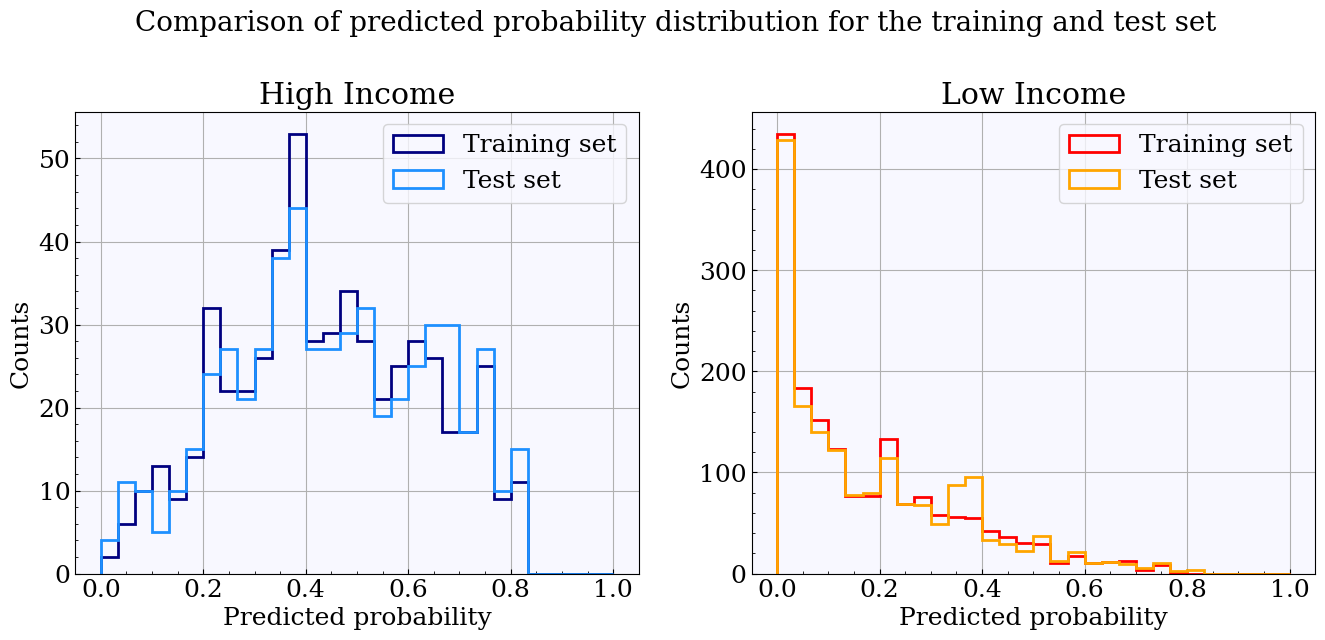

In [21]:
# Plot the train at test distributions

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs.flatten()

subtitle = fig.suptitle('Comparison of predicted probability distribution for the training and test set', fontsize=20)
subtitle.set_y(1.05)

titles = ['High Income', 'Low Income']

# Train
y_pred_high_train = y_pred[y_train == 1][:, 1]
y_pred_low_train = y_pred[y_train == 0][:, 1]   
axs[0].hist(y_pred_high_train, bins=30, range=(0,1), histtype='step', color='navy', label='Training set', lw=2)
axs[1].hist(y_pred_low_train, bins=30, range=(0,1), histtype='step', color='red', label='Training set', lw=2)

# Test
y_pred_high_test = test_y_pred[y_test == 1][:, 1]
y_pred_low_test = test_y_pred[y_test == 0][:, 1]
axs[0].hist(y_pred_high_test, bins=30, range=(0,1), histtype='step', color='dodgerblue', label='Test set', lw=2)
axs[1].hist(y_pred_low_test, bins=30, range=(0,1), histtype='step', color='orange', label='Test set', lw=2)

for ax in axs:
    ax.set(xlabel='Predicted probability', 
           ylabel='Counts', 
           title=titles.pop(0))
    ax.legend(loc='upper right')


if save_plots:
    plt.savefig('overtraining.png', dpi=300)

# Exercise 1b

In [22]:
# Find the most important features
feature_importance = model.feature_importances_
feature_importance = np.sort(feature_importance, axis=0)[::-1]

for i in range(len(feature_importance)):
    print(f'{train.columns[i]}: {feature_importance[i]:.3f}')

print(f'The most imHportant feature is: {train.columns[np.argmax(feature_importance)]}')

age: 108.000
education: 60.000
gender: 52.000
hours-per-week: 24.000
The most imHportant feature is: age


# Exercise 1c

In [23]:
real_data = pd.read_csv('earning_potential_real.txt', delimiter = ',', header=0, index_col=None)
real_data


,ID,age,education,gender,hours-per-week
0,0,40,9,1,40
1,1,28,13,1,48
2,2,49,10,1,30
3,3,32,9,0,40
4,4,33,9,0,40
...,...,...,...,...,...
3607,3607,46,11,1,63
3608,3608,47,10,1,40
3609,3609,74,9,1,40
3610,3610,55,10,0,40


In [51]:
# Use classifier to predict the earning potential of the real data

real_x = real_data.iloc[:, 1:].values
real_y_pred = model.predict_proba(real_x)

# ID's of the high income earners
high_earners_ID = real_data['ID'][real_y_pred[:,1] > cut_value]

# ID's of the low income earners
low_earners_ID = real_data['ID'][real_y_pred[:,1] <= cut_value]

# Save the results to a text file
np.savetxt('EmilieJessen.high_ID.txt', high_earners_ID, fmt='%d')
np.savetxt('EmilieJessen.low_ID.txt', low_earners_ID, fmt='%d')


In [52]:
# The number of low and high income earners that the classifier predicts

N_high_real = len(high_earners_ID)
N_low_real = len(low_earners_ID)

print(f'There are {len(real_x)} individuals included in the real data set.')
print(f'The classifier predicts {N_high_real} high income earners and {N_low_real} low income earners in the real data set.')

There are 3612 individuals included in the real data set.
The classifier predicts 128 high income earners and 3484 low income earners in the real data set.


# Exercise 2

In [26]:
# Loading the data 
data = pd.read_csv('cpd-crash-incidents.csv', delimiter=';', header=0, usecols=["lon", "lat", 'crash_date'])

# Negative longitude implies ‘West’, whereas positive implies ‘East’ from a spot in
# Greenwich Park in London, England

# Exercise 2a

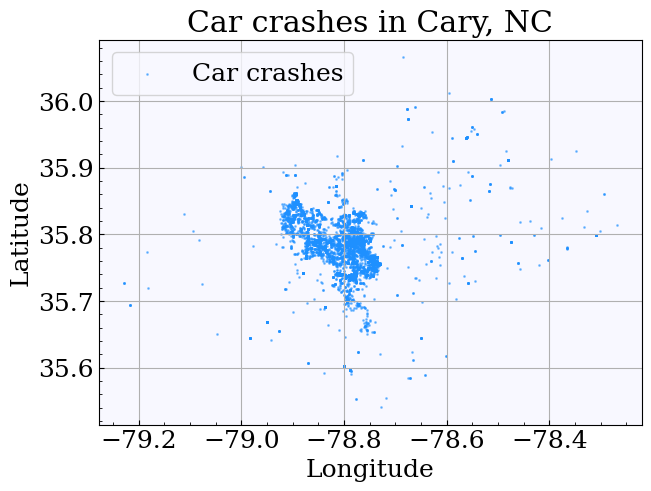

In [27]:
# Scatter plot of the car crashes, as a function of longitude and latitude

fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(data['lon'], data['lat'], s=1, alpha=0.5, label='Car crashes')
ax.set(xlabel='Longitude', 
       ylabel='Latitude', 
       title='Car crashes in Cary, NC')

ax.legend()

if save_plots:
       plt.savefig('car_crashes_cary.png', dpi=300)

In [28]:
# Histogram of the car crashes, as a function of the time of day (in hours)

# Extracting the hour and minutes of the day from the crash_date
data['crash_date'] = pd.to_datetime(data['crash_date'])
data['time_hour'] = data['crash_date'].dt.hour + data['crash_date'].dt.minute/60

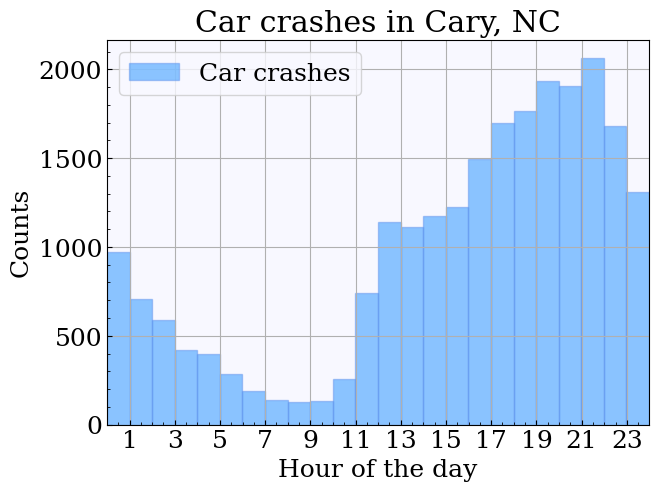

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(data['time_hour'], bins=24, alpha=0.5, edgecolor='cornflowerblue', label='Car crashes')
ax.set(xlabel='Hour of the day', 
       ylabel='Counts', 
       title='Car crashes in Cary, NC', 
       xticks=np.arange(1, 25, 2),
       xlim=(0, 24))


ax.legend()

if save_plots:
         plt.savefig('car_crashes_cary_hour.png', dpi=300)

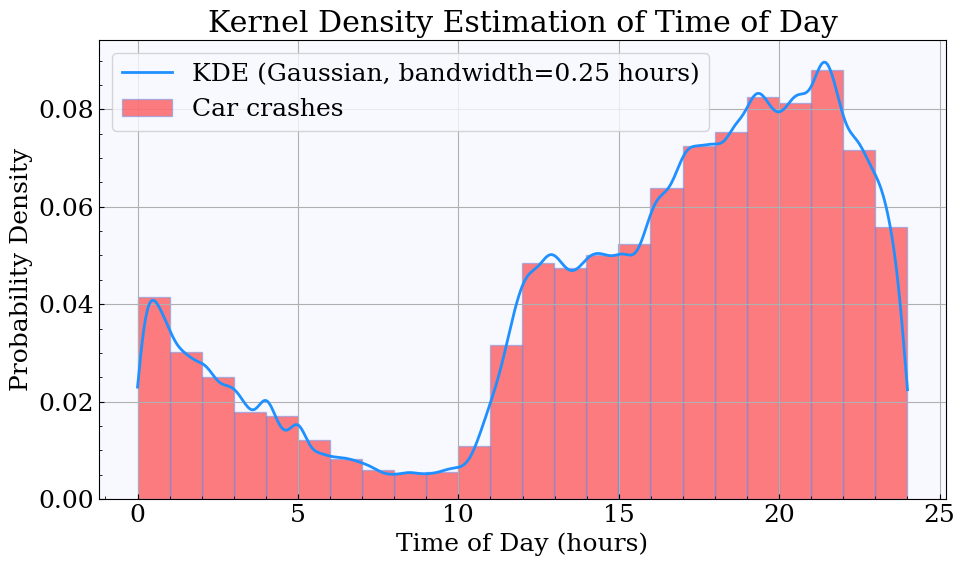

In [30]:
# Gaussian kernel density estimation (KDE) of the time of day

times = data['time_hour'].values

# Convert time data to a circular representation (minutes since midnight)
minutes_since_midnight = 60 * data['crash_date'].dt.hour + data['crash_date'].dt.minute #+ data['crash_date'].dt.second / 60

bandwidth_minutes = 15  # 0.25 hours * 60 minutes/hour

# Define the KDE function
def kernel_density_estimate(x, data, bandwidth):
    # Gaussian kernel function
    kernel = lambda u: (1 / np.sqrt(2 * np.pi)) * np.exp(-(u**2) / 2)
    
    # Calculate the KDE at a specific point x
    kde = np.sum(kernel((x - data) / bandwidth)) / (len(data) * bandwidth)
    return kde

# Create points for plotting the KDE curve
time_grid = np.linspace(0, 24 * 60, 1000)  # Grid of 1000 points representing a full day
kde_scores = np.array([kernel_density_estimate(x, minutes_since_midnight, bandwidth_minutes) for x in time_grid])

# Plot the KDE curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_grid / 60, kde_scores*60, lw=2, label='KDE (Gaussian, bandwidth=0.25 hours)')
ax.hist(times, bins=24, alpha=0.5, edgecolor='cornflowerblue', density=True, label='Car crashes')
ax.set_xlabel('Time of Day (hours)')
ax.set_ylabel('Probability Density')
ax.set_title('Kernel Density Estimation of Time of Day')
ax.legend()
fig.tight_layout()

if save_plots:
    plt.savefig('gaussian_KDE.png', dpi=300)

# Exercise 2b 

In [31]:
# Create a kernel density estimation using an Epanechnikov kernel with a bandwidth of
# 0.8 hours to produce a probability density function of the time of day for crashes

def epanechnikov_kernel(u, h):
    """Function to calculate the Epanechnikov kernel"""

    if np.abs(u) <= 1:
        return 3 / 4 * (1 - u**2)
    else:
        return 0
    
def KDE(data, point, h, kernel):
    """Function to calculate the kernel density estimate"""

    N = len(data)
    u = (point - data)

    # Ensure the wrapping of the data is considered, i.e. we want 12 hours on each side
    u[u > 12] -= 24 
    u[u < -12] += 24
    u /= h

    KDE = 1 / (N * h) * np.sum(np.array([kernel(i, h) for i in u]))

    return KDE

In [32]:
N_points = 24 * 60
t_axis = np.linspace(0, 24, N_points)
h = 0.8

# Create the kernel density estimate

KDE_epanechnikov = np.array([KDE(data['time_hour'], t, h, epanechnikov_kernel) for t in t_axis])

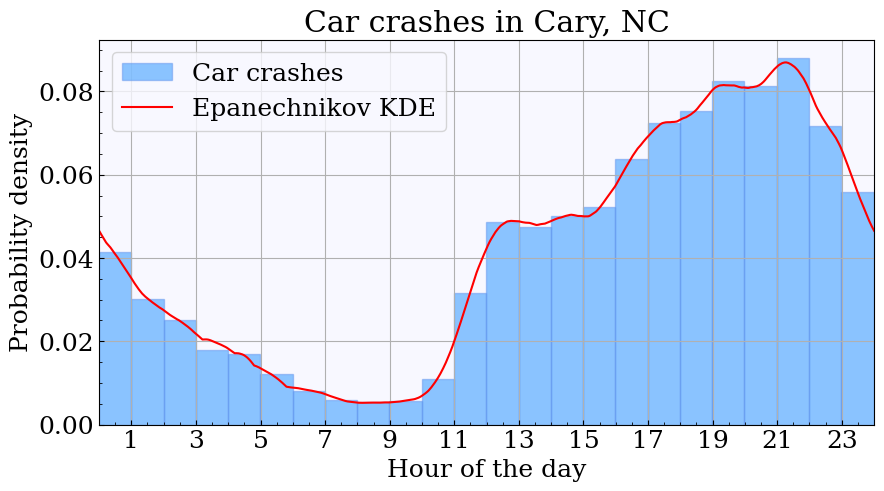

In [33]:
# Plot the KDE

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['time_hour'], bins=24, alpha=0.5, edgecolor='cornflowerblue', label='Car crashes', density=True)
ax.plot(t_axis, KDE_epanechnikov, label='Epanechnikov KDE')
ax.set(xlabel='Hour of the day', 
       ylabel='Probability density', 
       title='Car crashes in Cary, NC', 
       xticks=np.arange(1, 25, 2),
       xlim=(0, 24))

ax.legend()

if save_plots:
    plt.savefig('car_crashes_cary_KDE.png', dpi=300)

KDE for 0:23: 0.0422
KDE for 1:49: 0.0284
KDE for 8:12: 0.0052
KDE for 15:55: 0.0565
KDE for 18:02: 0.0733
KDE for 21:12: 0.0869
KDE for 23:44: 0.0510


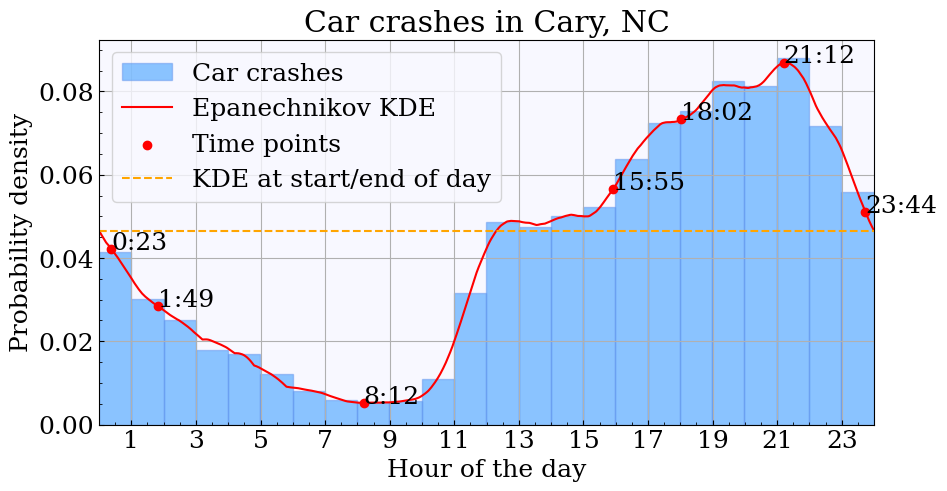

In [34]:
# Defining the time points from the assignment
hours = np.array([0, 1, 8, 15, 18, 21, 23])
minutes = np.array([23, 49, 12, 55, 2, 12, 44])

time_points = hours + minutes/60

# KDE for the time points
KDE_epanechnikov_points = np.array([KDE(data['time_hour'], t, h, epanechnikov_kernel) for t in time_points])

# Print the KDE for the time points
for i in range(len(hours)):
    if minutes[i] < 10:
        print(f'KDE for {hours[i]}:0{minutes[i]}: {KDE_epanechnikov_points[i]:.4f}')
    else:
        print(f'KDE for {hours[i]}:{minutes[i]}: {KDE_epanechnikov_points[i]:.4f}')


# Plot the KDE and the time points
        
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['time_hour'], bins=24, alpha=0.5, edgecolor='cornflowerblue', label='Car crashes', density=True)
ax.plot(t_axis, KDE_epanechnikov, label='Epanechnikov KDE')
ax.scatter(time_points, KDE_epanechnikov_points, color='red', label='Time points')
ax.hlines(KDE_epanechnikov[0], 0, 24, color='orange', linestyle='--', label='KDE at start/end of day')
ax.set(xlabel='Hour of the day', 
       ylabel='Probability density', 
       title='Car crashes in Cary, NC',
       xticks=np.arange(1, 25, 2),
       xlim=(0, 24))

# Plot the time points
for i in range(len(hours)):
    if minutes[i] < 10:
        ax.text(time_points[i], KDE_epanechnikov_points[i], f'{hours[i]}:0{minutes[i]}')
    else:
        ax.text(time_points[i], KDE_epanechnikov_points[i], f'{hours[i]}:{minutes[i]}')

ax.legend()

if save_plots:
    plt.savefig('car_crashes_cary_KDE_points.png', dpi=300)

In [35]:
# KDE PDF describes the relative crash likelihood during a 24-hour window
# If additional police patrolled the entire 24-hour time, then there would be a 10% decrease in the likelihood of accidents
# So what is the percentage of the 24-hour daily crashes that will be reduced by your 2-hour window?

window = 2 * 60         # 2-hour window
t_cyclic = np.concatenate((t_axis, t_axis[:window]))  # Add the overlapping part

KDE_epanechnikov_cyclic = np.concatenate((KDE_epanechnikov, KDE_epanechnikov[:window]))
KDE_decreased = KDE_epanechnikov_cyclic * 0.9     # 10% decrease in the likelihood of accidents

dt = np.diff(t_axis)[0]
total_KDE_integral = np.trapz(KDE_epanechnikov, dx=dt)  # Total integral of the KDE

reduction = np.zeros(N_points)

for i in range(N_points):
    end = i + window
    KDE_integral = np.trapz(KDE_epanechnikov_cyclic[i:end], dx=dt)
    KDE_decreased_integral = np.trapz(KDE_decreased[i:end], dx=dt)
    reduction[i] = (KDE_integral - KDE_decreased_integral) / total_KDE_integral * 100

In [36]:
# Find the maximum reduction

max_reduction = np.max(reduction)
max_reduction_time_start = t_axis[np.argmax(reduction)]
max_reduction_time_end = t_axis[np.argmax(reduction) + window]

print(f'The maximum reduction of {max_reduction:.2f}% occurs between') 
print(f'{int(max_reduction_time_start):.0f}:{(max_reduction_time_start*60) % 60:.0f} and {int(max_reduction_time_end):.0f}:{(max_reduction_time_end*60) % 60:.0f} hours')

The maximum reduction of 1.66% occurs between
19:58 and 21:58 hours


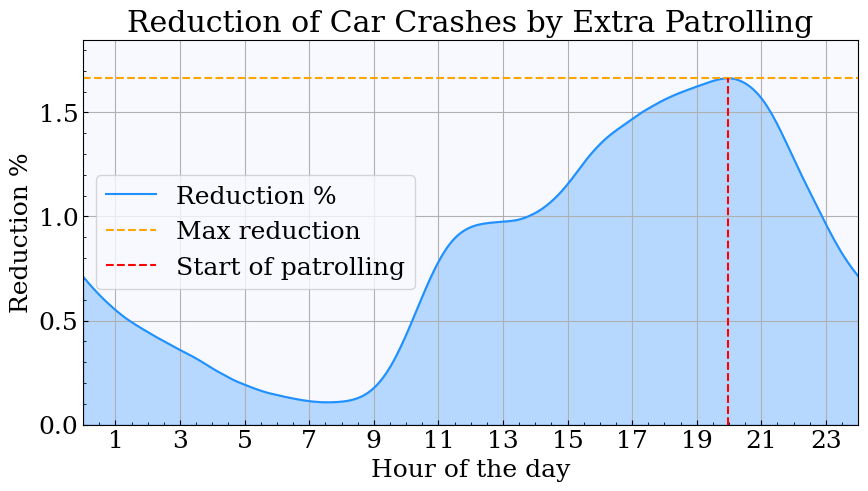

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t_axis, reduction, label='Reduction %')
ax.fill_between(t_axis, reduction, 0, color='dodgerblue', alpha=0.3)
ax.hlines(max_reduction, 0, 24, color='orange', linestyle='--', label='Max reduction')
ax.vlines(max_reduction_time_start, 0, max_reduction, color='red', linestyle='--', label='Start of patrolling')
ax.set(xlabel='Hour of the day', 
       ylabel='Reduction %', 
       title='Reduction of Car Crashes by Extra Patrolling', 
       xticks=np.arange(1, 25, 2),
       xlim=(0, 24), 
       ylim=(0, 1.85))

ax.legend(loc='center left')

if save_plots:
    plt.savefig('car_crashes_cary_KDE_decreased.png', dpi=300)


# Exercise 2c 

In [38]:
from sklearn.neighbors import KernelDensity

# Remove NaN values
lat = data['lat'][~np.isnan(data['lat'])]
lon = data['lon'][~np.isnan(data['lat'])]
lat = data['lat'][~np.isnan(data['lon'])]
lon = data['lon'][~np.isnan(data['lon'])]
pos = np.stack([lon, lat], axis=1)

h_2D = 0.01

longitude = np.linspace(np.min(lon), np.max(lon), 1000)
latitude = np.linspace(np.min(lat), np.max(lat), 1000)

xx, yy = np.meshgrid(longitude, latitude)  # Create a grid of latitude and longitude
xy_plot = np.stack([xx.ravel(), yy.ravel()], axis=1)

kde_2D = KernelDensity(kernel='epanechnikov', bandwidth=h_2D).fit(pos) # creating density from samples
pdf_2D = np.exp(kde_2D.score_samples(xy_plot))
pdf_2D = pdf_2D.reshape(1000, 1000)

In [39]:
# Define the box
box_lon = np.array([-78.76, -78.72])
box_lat = np.array([35.74, 35.78])

dx = longitude[1] - longitude[0]
dy = latitude[1] - latitude[0]

# Percentage of crashes inside the box
mask_lon = [(longitude > box_lon[0]) & (longitude < box_lon[1])]
mask_lat = [(latitude > box_lat[0]) & (latitude < box_lat[1])]
LON_mask, LAT_mask = np.meshgrid(mask_lon, mask_lat)
box_mask = LON_mask & LAT_mask
box_integral = np.sum(pdf_2D[box_mask] * dx * dy )

print(f'The percentage of crashes inside the box is {box_integral * 100:.2f}%')

The percentage of crashes inside the box is 13.87%


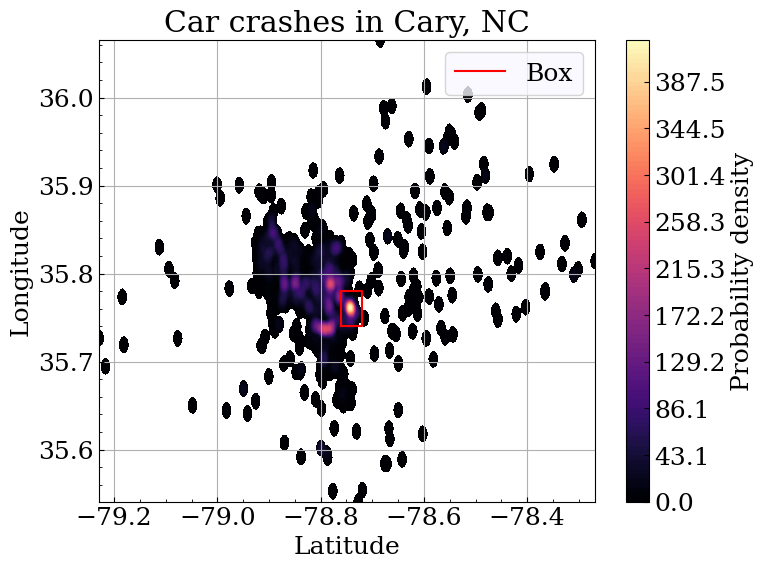

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

# Plotting
contour_levels = np.linspace(pdf_2D.min(), pdf_2D.max(), 100)
sc = ax.contourf(longitude, latitude, pdf_2D, levels=contour_levels, cmap='magma')
fig.colorbar(sc, ax=ax, label='Probability density')

ax.contourf(longitude, latitude, pdf_2D, levels=[0, 0.0001], colors=['white'])


# Plot the box
ax.plot([box_lon[0], box_lon[1], box_lon[1], box_lon[0], box_lon[0]], 
        [box_lat[0], box_lat[0], box_lat[1], box_lat[1], box_lat[0]], 
        color='red', linestyle='-', label='Box')

ax.set(xlabel='Latitude',
         ylabel='Longitude',
         title='Car crashes in Cary, NC')

ax.legend()

if save_plots:
    plt.savefig('car_crashes_cary_2D_KDE.png', dpi=300)

# Exercise 3a

In [41]:
# Loading the data 
nuc_data = np.loadtxt('NucData.txt', skiprows=0)

# Defining the number of trials and events
N_trials = 100
N_events = 200

def integrator(t, b, sigma):
    """Function to calculate the integrant for the probability density function"""
    t_mark = np.linspace(0, 200, 600)
    exp = np.exp(-t_mark / b) / b 
    gauss = np.exp(-(t - t_mark)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    integrant = exp * gauss
    return np.trapz(integrant, t_mark)
    

def pdf(t, b, sigma):
    """Function to calculate the probability density function 
    for a exponential decay with Gaussian resolution"""
    t_array = np.sort(t.ravel())
    t_array = np.sort(t)
    func = np.array([integrator(t_array[i], b, sigma) for i in range(len(t_array))])
    func /= np.trapz(func, t_array)
    return func


def llh(data, b, sigma): 
    """Function to calculate the log-likelihood function"""
    return np.sum(np.log(pdf(np.sort(data), b, sigma)))

In [42]:
print('The maximum time value in the data is:', np.max(nuc_data))

The maximum time value in the data is: 9.914763


In [43]:
# Fit the 100 psedo-experiments with 200 events in each 

# Arrays for storing values for null hypothesis
b_values0 = np.zeros(N_trials)
sigma_values0 = np.zeros(N_trials)
llh_vals0 = np.zeros(N_trials)

# Arrays for storing values for alternative hypothesis
b_values1 = np.zeros(N_trials)
sigma_values1 = np.zeros(N_trials)
llh_vals1 = np.zeros(N_trials)

# Array for storing the likelihood ratio
llh_ratio = np.zeros(N_trials)

# Initial values for the fit
initial_values = [1, 0.5]

for i in range(N_trials):

    # Extract data
    data = nuc_data[i*N_events:(i+1)*N_events]
    data = np.sort(np.sort(data.ravel()))

    def fit_obj(b, sigma): 
        return -llh(data, b, sigma)

    # Testing null hypothesis b = 1
    minuit = Minuit(fit_obj, *initial_values)
    minuit.fixed['b'] = True
    minuit.limits['sigma'] = (0.1, None)
    minuit.migrad()

    b_values0[i] = minuit.values[0]
    sigma_values0[i] = minuit.values[1]
    llh_vals0[i] = llh(data, 1, sigma_values0[i])

    # Testing alternative hypothesis b != 1
    minuit = Minuit(fit_obj, *initial_values)
    minuit.limits['b'] = (0.1, None)
    minuit.limits['sigma'] = (0.1, None)
    minuit.migrad()
    
    b_values1[i] = minuit.values[0]
    sigma_values1[i] = minuit.values[1]
    llh_vals1[i] = llh(data, b_values1[i], sigma_values1[i])

    # Calculate the likelihood "ratio"
    llh_ratio[i] = -2 * (llh_vals0[i] - llh_vals1[i])

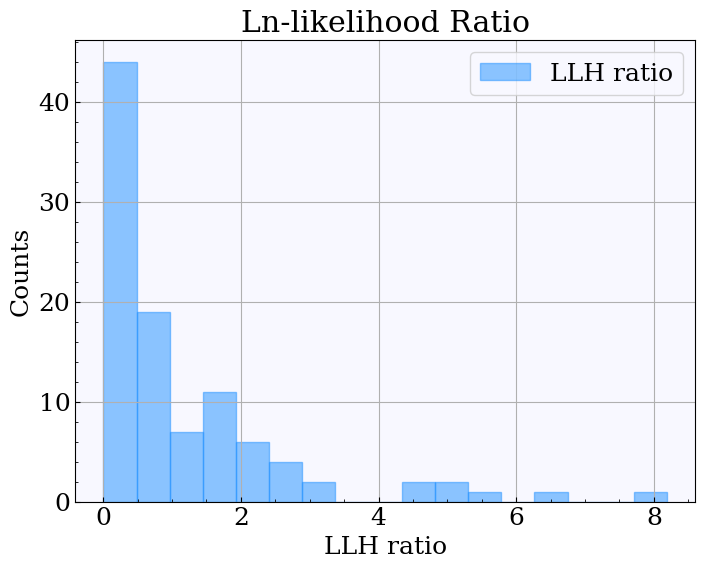

In [44]:
# Plot the likelihood values

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(llh_ratio, bins=17, edgecolor='dodgerblue', alpha=0.5, label='LLH ratio')
ax.set(xlabel='LLH ratio', 
       ylabel='Counts', 
       title='Ln-likelihood Ratio')

ax.legend()

if save_plots:
       plt.savefig('likelihood_ratio.png', dpi=300)

# Exercise 3b 

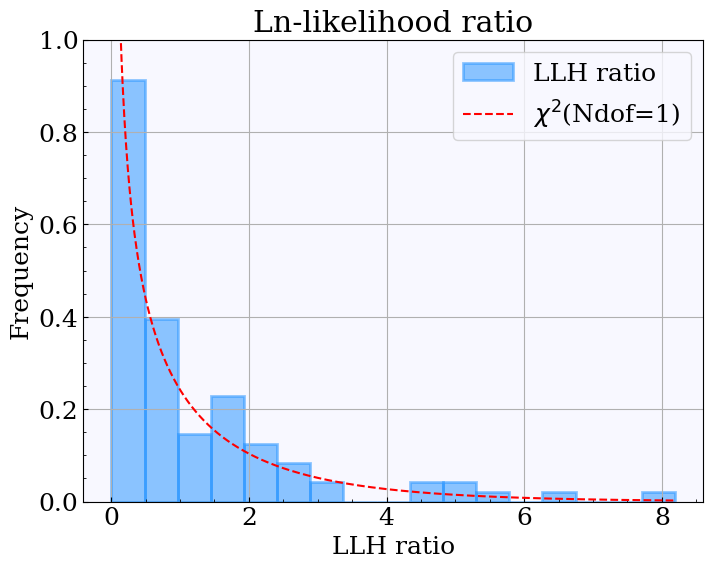

In [45]:
# Plot the likelihood values and the chi2 distribution with 1 degree of freedom
# 1 degree of freedom since the difference in dimensionalyty between the two models is 1

llh_axis = np.linspace(llh_ratio.min(), llh_ratio.max(), 1000)
chi2_ndof1 = scipy.stats.chi2.pdf(llh_axis, 1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(llh_ratio, bins=17, lw=2, alpha=0.5, edgecolor='dodgerblue', density=True, label='LLH ratio')
ax.plot(llh_axis, chi2_ndof1, '--', label=r'$\chi^2$(Ndof=1)')
ax.set(xlabel='LLH ratio', 
       ylabel='Frequency', 
       title='Ln-likelihood ratio',
       ylim=(0, 1))

ax.legend()

if save_plots:
       plt.savefig('likelihood_ratio_chi2.png', dpi=300)

In [46]:
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()

    # Counts how many observations are below x
    cdf = sum(sample <= x)

    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

In [47]:
# Kolmogorov-Smirnov test for the likelihood ratio distribution and the chi2 distribution with 1 degree of freedom

# Calculate the cumulative distribution function for the likelihood ratio
cdf_vals = np.array([cdf(llh_ratio, i, sort=True) for i in llh_axis])

# Max difference between the two distributions
D = np.max(np.abs(cdf_vals - scipy.stats.chi2.cdf(llh_axis, 1)))

# Calculate the p-value for the Kolmogorov-Smirnov test
p_value = scipy.stats.kstwo.sf(D, len(llh_ratio))

print(f'The Kolmogorov-Smirnov test gives a p-value of {p_value:.3f}')

# Calculate the number of likelihood ratio values that are larger than 2.706
ratio_cut = np.sum(llh_ratio > 2.706)

print(f'The number of the likelihood ratio values that are larger than 2.706 is {ratio_cut:.0f}')

# Calculate the expected number of likelihood ratio values that are larger than 2.706
sf = scipy.stats.chi2.sf(2.706, 1)

print(f'For a chi2-distribution with 1 degree of freedom for 100 data points:')
print(f'we would expect {sf*100:.0f} ratio values to be larger than 2.706')

The Kolmogorov-Smirnov test gives a p-value of 0.065
The number of the likelihood ratio values that are larger than 2.706 is 10
For a chi2-distribution with 1 degree of freedom for 100 data points:
we would expect 10 ratio values to be larger than 2.706


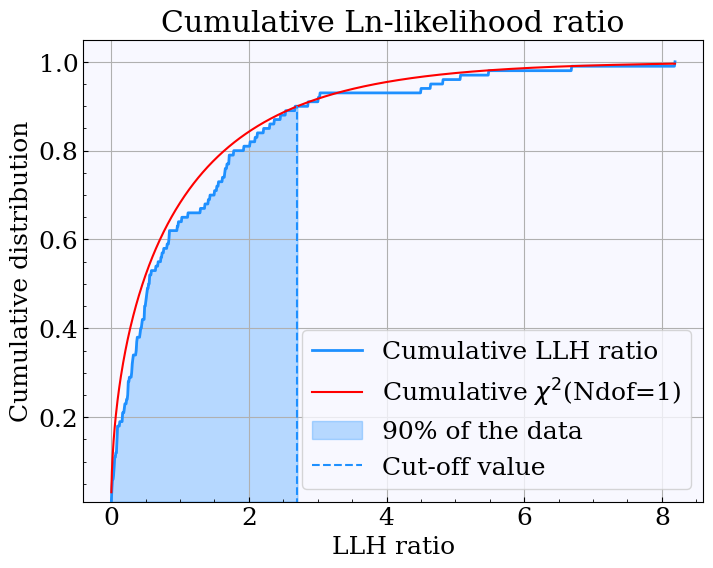

In [48]:
# Plot cumulative distribution function of the likelihood ratio
percent = (100-ratio_cut)/100,
idx = int(np.argwhere(cdf_vals > percent)[0])

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(llh_axis, cdf_vals, lw=2, label='Cumulative LLH ratio')
ax.plot(llh_axis, scipy.stats.chi2.cdf(llh_axis, 1), label=r'Cumulative $\chi^2$(Ndof=1)')
ax.fill_betweenx(cdf_vals[:idx], llh_axis[:idx], 2.706, color='dodgerblue', alpha=0.3, label=f'{100-ratio_cut}% of the data')
ax.vlines(2.706, 0, percent, color='dodgerblue', linestyle='--', label='Cut-off value')


ax.set(xlabel='LLH ratio',
         ylabel='Cumulative distribution',
         title='Cumulative Ln-likelihood ratio',
         ylim=(0.01, 1.05))

ax.legend()

if save_plots:
    plt.savefig('likelihood_ratio_cdf.png', dpi=300)


In [49]:
scipy.stats.chi2.sf(2.706, 1)

0.09997137812525883